In [5]:
import pandas as pd
df = pd.read_csv('names_1887-2023.csv')

In [11]:
# cast rank to int
df["Rank"] = df["Rank"].astype(int)
df["maleRatio"] = df['PctOfMaleBirths'].apply(lambda x: x.replace('%', '')).astype(float)/100
df["femaleRatio"] = df['PctOfFemaleBirths'].apply(lambda x: x.replace('%', '')).astype(float)/100

In [33]:

def create_most_popular_names_plot(top_x=20):
        
    byYear = df.query("Rank <=@top_x").groupby("Year")
    # aggreate the sum of maleRatio for each group
    byYear = byYear.agg({"maleRatio": "sum", "femaleRatio": "sum"})
    byYear.plot(title=f'{top_x} most popular names by percentage of total births')

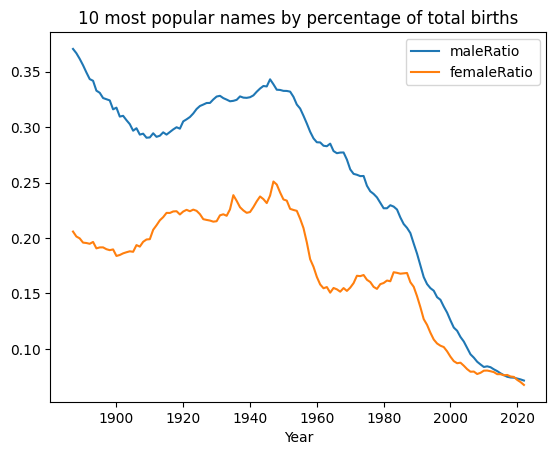

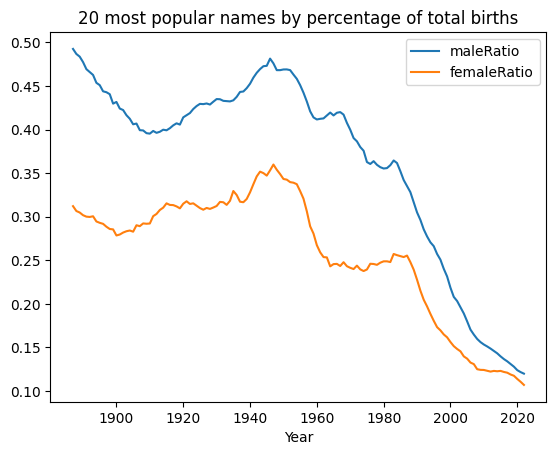

In [35]:
create_most_popular_names_plot(10)
create_most_popular_names_plot(20)

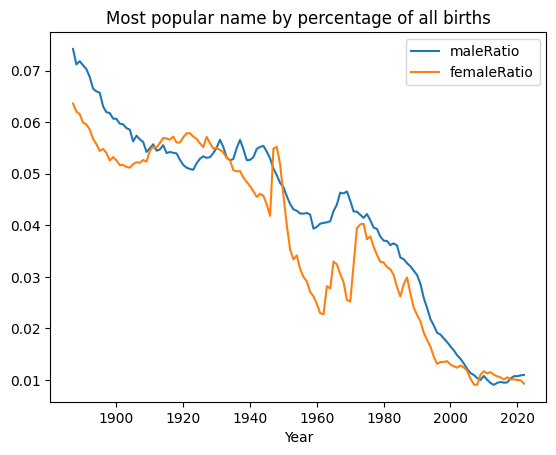

In [38]:
def most_popular_name_by_percentage_of_all():
    top_names = df.query("Rank == 1")
    top_names.plot(x="Year", y=["maleRatio", "femaleRatio"], title="Most popular name by percentage of all births")
    
most_popular_name_by_percentage_of_all()

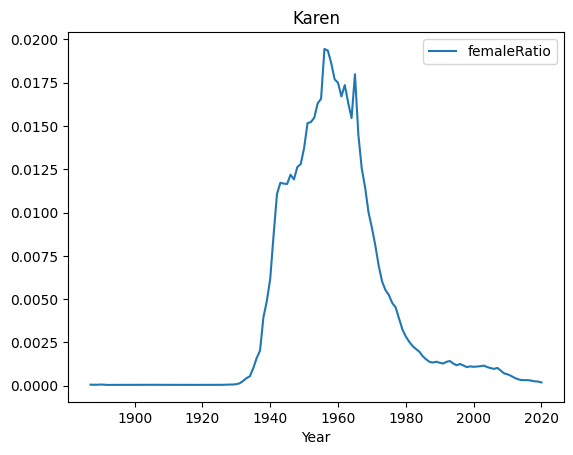

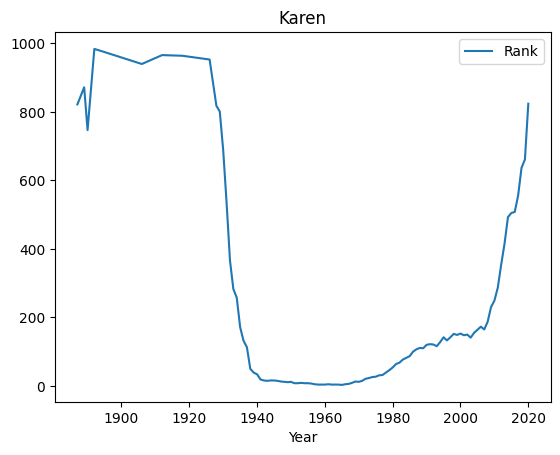

In [47]:
def popularity_of_female_name_over_time(name:str):
    
    iris = df[df['Female name']==name]
    iris.plot(x="Year", y=["femaleRatio"], title=name)
    iris.plot(x="Year",y=["Rank"], title=name)
    
popularity_of_female_name_over_time("Karen")

<Axes: title={'center': 'Emil'}, xlabel='Year'>

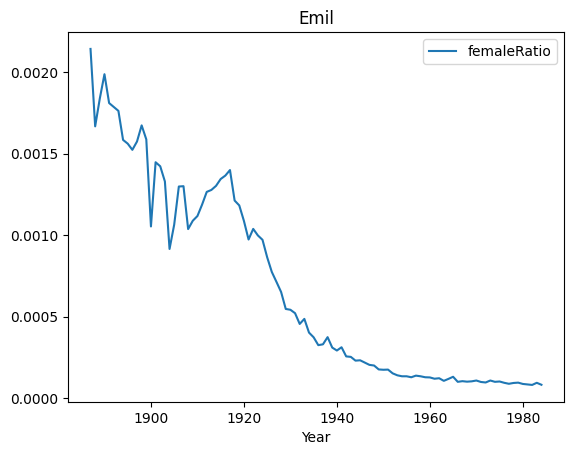

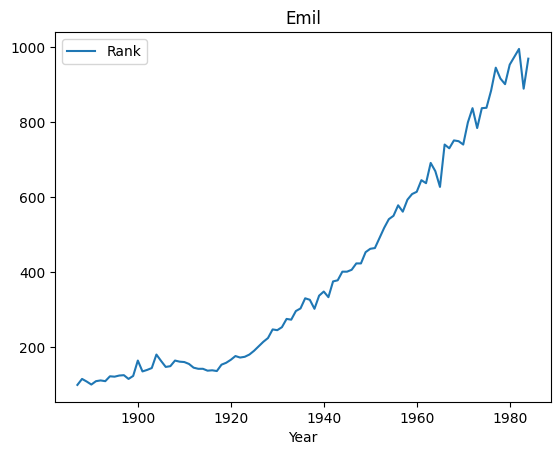

In [46]:
iris = df[df['Male name']=="Emil"]
iris.plot(x="Year", y=["femaleRatio"], title="Emil")
iris.plot(x="Year",y=["Rank"], title="Emil")